In [4]:
from scipy.stats import stats
import pandas as pd
import numpy as np


def ssw(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    return np.sum([
        (
            main_data.loc[main_data[group_col] == group, value_col] -
            main_data.loc[main_data[group_col] == group, value_col].mean()
        ) ** 2
        for group in group_names
    ])


def ssb(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    overall_mean = main_data[value_col].mean()
    return np.sum([
        len(main_data.loc[main_data[group_col] == group, value_col]) * (
            main_data.loc[main_data[group_col] == group, value_col].mean() -
            overall_mean
        ) ** 2
        for group in group_names
    ])


# Файл данных должен лежать в папке с файлом .py (или .ipynb) 
data = pd.read_csv(r"D:\DataSets\genetherapy.csv")
groups = data['Therapy'].unique()
subsets = [data.query('Therapy == @group')['expr'] for group in groups]

ssb_df = len(groups) - 1
ssw_df = data.shape[0] - len(groups)

SSW = ssw(data, 'Therapy', 'expr')
SSB = ssb(data, 'Therapy', 'expr')

f_val, p_val = stats.f_oneway(*subsets)

anova_results = pd.DataFrame([
{
        'Df': ssb_df,
        'Sum Sq': '{0:.2f}'.format(SSB),
        'Mean Sq': '{0:.2f}'.format(SSB / ssb_df),
        'F-value': '{0:.2f}'.format(f_val),
        'p-value': '{0:.4f}'.format(p_val),
    },
    {
        'Df': ssw_df,
        'Sum Sq': '{0:.2f}'.format(SSW),
        'Mean Sq': '{0:.2f}'.format(SSW / ssw_df),
        'F-value': '',
        'p-value': '',
    },
], index=['Therapy', 'Residuals'])

print(anova_results)

           Df   Sum Sq Mean Sq F-value p-value
Therapy     3   560.72  186.91    8.04  0.0002
Residuals  56  1302.27   23.25                



F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)
A 99.73333333333333 4.1656189158852435
B 98.8 5.894307180904058
C 94.4 5.193402408000807
D 92.33333333333333 3.7352886036263593


C:\Users\Denis\AppData\Local\Temp\ipykernel_720\2335176663.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=listName, y=listMEAN, yerr=listERR, color='black', capsize=3,


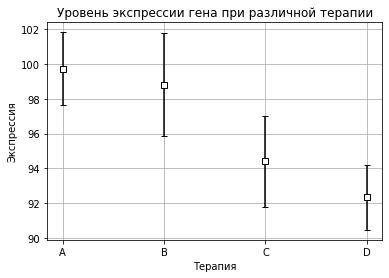

In [6]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Прочитаем заранее сохраненный файл с данными

A = list(data[data['Therapy'] == 'A']['expr'])
B = list(data[data['Therapy'] == 'B']['expr'])
C = list(data[data['Therapy'] == 'C']['expr'])
D = list(data[data['Therapy'] == 'D']['expr'])

print()
print(stats.f_oneway(A, B, C, D))

# Output:
# F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)


# Теперь нарисуем график

listName = []
listMEAN = []
listERR = []

for group, frame in data.groupby('Therapy')['expr']:
    print(group, frame.mean(), frame.std())
    listName.append(group)
    listMEAN.append(frame.mean())
    listERR.append(frame.std()/2)

plt.errorbar(x=listName, y=listMEAN, yerr=listERR, color='black', capsize=3,
             marker='s', markersize=6, mfc='white',mec='black', fmt='o')
plt.title('Уровень экспрессии гена при различной терапии')
plt.grid()
plt.xlabel('Терапия')
plt.ylabel('Экспрессия')
plt.show()